In [255]:
import pandas as pd

In [256]:
colnames=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
         ' Normal Nucleoli', 'Mitoses', 'Present' ] 

df = pd.read_csv('../../../Data/breast-cancer1.csv', names=colnames, header=None)

In [257]:
df = df.set_index('Sample code number')


In [258]:
df['Present'] = (df['Present']==4).astype(int)


In [259]:
df.head(20)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Present
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0
1017122,8,10,10,8,7,10,9,7,1,1
1018099,1,1,1,1,2,10,3,1,1,0
1018561,2,1,2,1,2,1,3,1,1,0
1033078,2,1,1,1,2,1,1,1,5,0


                             Clump Thickness  Uniformity of Cell Size  \
Clump Thickness                     1.000000                 0.644913   
Uniformity of Cell Size             0.644913                 1.000000   
Uniformity of Cell Shape            0.654589                 0.906882   
Marginal Adhesion                   0.486356                 0.705582   
Single Epithelial Cell Size         0.521816                 0.751799   
Bland Chromatin                     0.558428                 0.755721   
 Normal Nucleoli                    0.535835                 0.722865   
Mitoses                             0.350034                 0.458693   
Present                             0.716001                 0.817904   

                             Uniformity of Cell Shape  Marginal Adhesion  \
Clump Thickness                              0.654589           0.486356   
Uniformity of Cell Size                      0.906882           0.705582   
Uniformity of Cell Shape                 

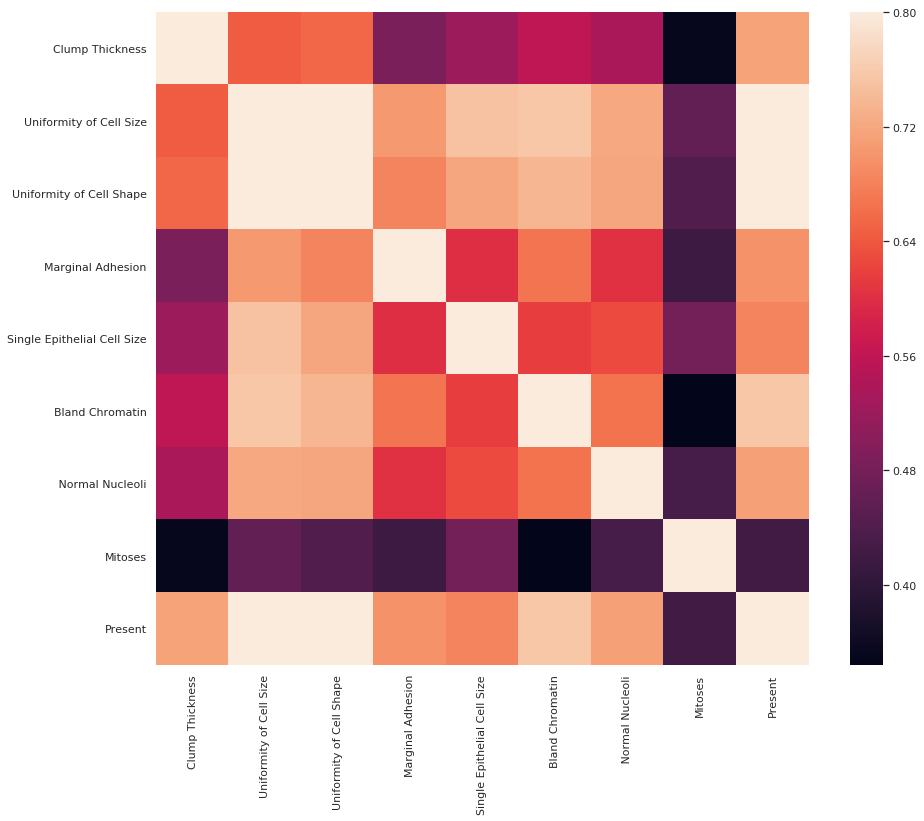

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
 Normal Nucleoli               699 non-null int64
Mitoses                        699 non-null int64
Present                        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [262]:
df = df.rename(columns={"Bare Nuclei": "Bare_Nuclei"})


In [263]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].str.replace('?', '100')
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(str).astype(int)
df = df[df['Bare_Nuclei']!=100]

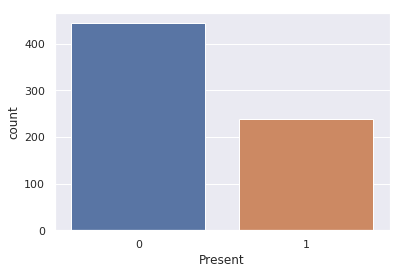

In [264]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Present", data=df)

In [265]:
X = df.drop('Present',1)
y = df['Present']

#Randomly split the data

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [266]:

from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=4, random_state=11, n_estimators=200).fit(X_train, y_train)

In [267]:
clf.score(X_test,y_test)


0.9512195121951219

In [270]:
clf.score(df.drop('Present',1),df['Present'])


0.9795021961932651

In [271]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf, X_test, y_test, cv=10))
print('\n\n\n')


print('Feature Importance\n')
listoff=[]
for feature in zip(list(df), clf.feature_importances_):
    listoff.append(feature)
    print(feature)

[0.95238095 0.9047619  0.95238095 1.         0.9047619  0.95238095
 0.9047619  0.95       0.89473684 0.94736842]




Feature Importance

('Clump Thickness', 0.03308450349337352)
('Uniformity of Cell Size', 0.24769977224252976)
('Uniformity of Cell Shape', 0.2533419775380986)
('Marginal Adhesion', 0.016789999114982593)
('Single Epithelial Cell Size', 0.09432177827196142)
('Bare_Nuclei', 0.20767233189182221)
('Bland Chromatin', 0.06909943450284663)
(' Normal Nucleoli', 0.07264867596021846)
('Mitoses', 0.0053415269841669165)


In [273]:
fX, fy = df.iloc[:,:-1], df.iloc[:,-1]
fullpred = clf.predict(fX)

full_table = pd.crosstab(fullpred, fy, margins=True)

full_tI_errors = full_table.loc[0.0,1.0] / full_table.loc['All','All']
full_tII_errors = full_table.loc[1.0,0.0] / full_table.loc['All','All']

print((
    'Percent Type I errors: {:.8f}\n\n'
    'Percent Type II errors: {:.8f}\n\n'
).format(full_tI_errors, full_tII_errors))


Percent Type I errors: 0.00439239

Percent Type II errors: 0.01610542


